In [1]:
import numpy as np
import scipy.fftpack as sp
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def signal_gen(coeffs,x_array,freqs):
    
    signal = np.zeros(len(x_array))
    
    for c,f in zip(coeffs,freqs):
        
        signal += c*np.sin(f*2*np.pi*x_array)
        
    return signal

In [3]:
# Number of samplepoints
N = 4096
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
coefficients = (0.5,0.7,0.1,0.9,0.6,0.5)
freqs = (50,200,30,76.789,125)

y = signal_gen(coefficients,x,freqs)

print(x.size)
print(y.size)

4096
4096


In [4]:
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

print("T:", str(T))
print("Max freq:", str(1.0/(2.0*T)))
print("N:", str(N))

T: 0.00125
Max freq: 400.0
N: 4096


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [5]:
print(xf.size)
print(yf.size)

2048
4096


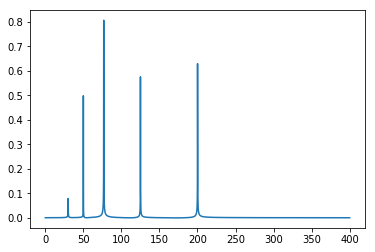

In [6]:
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [7]:
data = pd.read_csv('Data/60_49_77_93_79.csv')
data.shape[0]

8192

In [11]:
N_data = data.shape[0]
T_data = data['Time'][1] - data['Time'][0]

print(N_data)
print(T_data)
print(1.0/(2*T_data))

8192
0.0012208521548040534
409.54999999999995


In [12]:
### This works, but I don't know why. Will try with another file also.
### Update: works with other files with a freqmax of less than 200Hz
yf_data = np.fft.fft(data['Signal'])
xf_data = np.linspace(0.0, 1.0/(4.0*T_data), int(N_data/4))

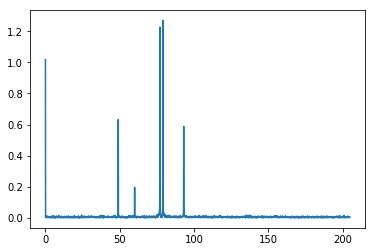

In [15]:
plt.plot(xf_data, 2.0/N * np.abs(yf_data[:N//2]))
plt.show()